### We will extract pixel vallue for each image and pass it to the input layer -> hidden layer -> output

In [25]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import pickle

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape #a 3-D array with 60000 images and each image is 28*28 numpy array

(60000, 28, 28)

In [4]:
X_test.shape #X_test consists of 10000 images

(10000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

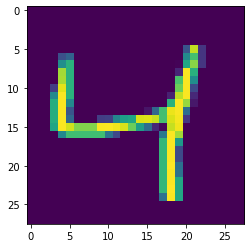

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [7]:
X_train[0].max()

255

#### We will now divide the dataset by 255 to bring it in the range of (0,1)

In [8]:
X_train=X_train/255
X_test=X_test/255

In [9]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
#We also have to flatten the image to conver it from higher dimension to 1-D

In [11]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))#this will convert the data into 1-D 28*28=784 inputs

#1st dense layer 
model.add(Dense(128,activation='relu'))#no need to mention input_dim because output of flatten will only be passed on to this layer

model.add(Dense(32,activation='relu'))

#output layer
model.add(Dense(10,activation='softmax'))#10 because we have 10 output classes ->0,1,2,3,.....,9
#always us softmax activation funct when you have more than one output node in classification

In [12]:
model.summary() #(784*128+128) + (128*10+10)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [13]:
#the only difference between sparse_categorical_cross_entropy and categorical_cross_entropy is that there is no need for onehotencoding in sparse_categorical_cross_entropy 
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [14]:
history=model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2859 - accuracy: 0.9164 - val_loss: 0.1570 - val_accuracy: 0.9537
Epoch 2/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1240 - accuracy: 0.9624 - val_loss: 0.1162 - val_accuracy: 0.9647
Epoch 3/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0851 - accuracy: 0.9741 - val_loss: 0.0939 - val_accuracy: 0.9718
Epoch 4/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0637 - accuracy: 0.9804 - val_loss: 0.0995 - val_accuracy: 0.9710
Epoch 5/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0483 - accuracy: 0.9852 - val_loss: 0.1007 - val_accuracy: 0.9693
Epoch 6/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0393 - accuracy: 0.9874 - val_loss: 0.1077 - val_accuracy: 0.9696
Epoch 7/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0309 - accuracy: 0.9902 - val_loss: 0.0959 - val_accuracy:

In [15]:
y_prob=model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [16]:
#for every array we will have to find at which index position is prob max
y_pred=y_prob.argmax(axis=1)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(y_test,y_pred)

0.9747

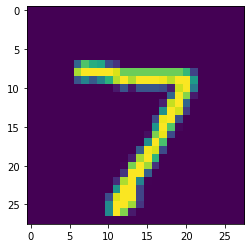

In [19]:
plt.imshow(X_test[0])

In [20]:
X_test[0].shape

(28, 28)

In [21]:
 model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 22ms/step


array([7], dtype=int64)

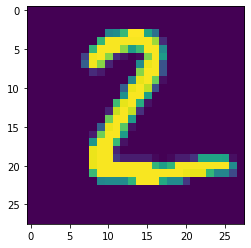

In [22]:
plt.imshow(X_test[1])

In [23]:
 model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 17ms/step


array([2], dtype=int64)

In [27]:
model.save('model.h5')
from keras.models import load_model

model = load_model('model.h5')
